# 弹性网回归（Elastic Net Regression）
---

本节介绍如何使用 Tensorflow 来求解弹性网络回归。$y=Ax+b$

我们使用 iris 数据，指定：

$y = Sepal Length$

$x = Petal Length, Petal Width, Sepal Width$

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from sklearn import datasets
from tensorflow.python.framework import ops

## tf 设置

In [2]:
ops.reset_default_graph()

# Create graph
sess = tf.Session()

## 加载数据

In [3]:
# Load the data
# iris.data = [(Sepal Length, Sepal Width, Petal Length, Petal Width)]
iris = datasets.load_iris()
x_vals = np.array([[x[1], x[2], x[3]] for x in iris.data])
y_vals = np.array([y[0] for y in iris.data])

## 模型设置

In [4]:
# make results reproducible
seed = 13
np.random.seed(seed)
tf.set_random_seed(seed)

# Declare batch size
batch_size = 50

# Initialize placeholders
x_data = tf.placeholder(shape=[None, 3], dtype=tf.float32)
y_target = tf.placeholder(shape=[None, 1], dtype=tf.float32)

# Create variables for linear regression
A = tf.Variable(tf.random_normal(shape=[3, 1]))
b = tf.Variable(tf.random_normal(shape=[1, 1]))

# Declare model operations
model_output = tf.add(tf.matmul(x_data, A), b)

# Declare the elastic net loss function
elastic_param1 = tf.constant(1.)
elastic_param2 = tf.constant(1.)
l1_a_loss = tf.reduce_mean(tf.abs(A))
l2_a_loss = tf.reduce_mean(tf.square(A))
e1_term = tf.multiply(elastic_param1, l1_a_loss)
e2_term = tf.multiply(elastic_param2, l2_a_loss)
loss = tf.expand_dims(tf.add(tf.add(tf.reduce_mean(tf.square(y_target - model_output)), e1_term), e2_term), 0)

# Declare optimizer
my_opt = tf.train.GradientDescentOptimizer(0.001)
train_step = my_opt.minimize(loss)

## 训练模型

In [5]:
# Initialize variables
init = tf.global_variables_initializer()
sess.run(init)

# Training loop
loss_vec = []
for i in range(1000):
    rand_index = np.random.choice(len(x_vals), size=batch_size)
    rand_x = x_vals[rand_index]
    rand_y = np.transpose([y_vals[rand_index]])
    sess.run(train_step, feed_dict={x_data: rand_x, y_target: rand_y})
    temp_loss = sess.run(loss, feed_dict={x_data: rand_x, y_target: rand_y})
    loss_vec.append(temp_loss[0])
    if (i+1) % 250 == 0:
        print('Step #' + str(i+1) + ' A = ' + str(sess.run(A)) + ' b = ' + str(sess.run(b)))
        print('Loss = ' + str(temp_loss))

Step #250 A = [[ 1.26014626]
 [ 0.4016138 ]
 [ 0.40159121]] b = [[-0.14889474]]
Loss = [ 1.59188581]
Step #500 A = [[ 1.17897248]
 [ 0.46715766]
 [ 0.29896322]] b = [[-0.0677181]]
Loss = [ 1.46314824]
Step #750 A = [[ 1.13416564]
 [ 0.51899707]
 [ 0.21090424]] b = [[ 0.01904622]]
Loss = [ 1.37157845]
Step #1000 A = [[ 1.09745109]
 [ 0.54604095]
 [ 0.13102381]] b = [[ 0.10402215]]
Loss = [ 1.27774763]


## 提取模型结果

In [6]:
# Get the optimal coefficients
[[sw_coef], [pl_coef], [pw_coef]] = sess.run(A)
[y_intercept] = sess.run(b)

## 绘制结果

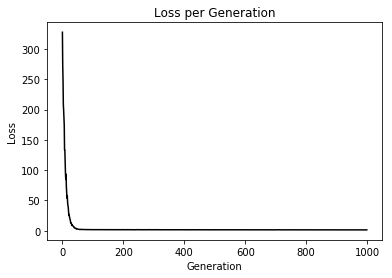

In [7]:
# Plot loss over time
plt.plot(loss_vec, 'k-')
plt.title('Loss per Generation')
plt.xlabel('Generation')
plt.ylabel('Loss')
plt.show()